In [139]:

import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

In [140]:
indicators_data=pd.read_csv("520_Data.csv",nrows=1989)

In [141]:
indicators_data.shape

(1989, 6)

In [142]:
indicators_data

,Date,DJI,S&P500,NASDAQ,Russell_3000,Willshire_5000
0,8/8/2008,11734.32,1296.32,2414.100,756.344,13197.13
1,8/11/2008,11782.35,1305.32,2439.950,762.564,13307.96
2,8/12/2008,11642.47,1289.59,2430.610,753.948,13163.60
3,8/13/2008,11532.96,1285.83,2428.620,752.935,13145.53
4,8/14/2008,11615.93,1292.93,2453.670,757.509,13228.23
...,...,...,...,...,...,...
1984,6/27/2016,17140.24,2000.54,4594.443,1177.348,20675.10
1985,6/28/2016,17409.72,2036.09,4691.867,1198.448,21045.53
1986,6/29/2016,17694.68,2070.77,4779.246,1219.612,21419.50
1987,6/30/2016,17929.99,2098.86,4842.672,1236.623,21711.72


In [219]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['DJI'].rolling(window=7).mean()
    dataset['ma21'] = dataset['DJI'].rolling(window=21).mean()
    
# #     # Create MACD
    dataset['26ema'] = pd.DataFrame.ewm(dataset['DJI'], span=26).mean()
    dataset['12ema'] = pd.DataFrame.ewm(dataset['DJI'], span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['20sd'] = dataset['DJI'].rolling(window=11).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
#     # Create Exponential moving average
    #dataset['ema'] = dataset['DJI'].ewm(com=0.5).mean()
    
    # Create Momentum
    #dataset['momentum'] = (dataset["DJI"]*dataset["DJI"].shift(1))/10000

    #fourier
    close_fft = np.fft.fft(np.asarray(dataset['DJI'].tolist()))
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    fft_list = np.asarray(fft_df['fft'].tolist())
    
    fft_3= np.copy(fft_list);
    fft_3[3:-3]=0
    dataset["fourier_3"]=np.fft.ifft(fft_3).real
    
    fft_6= np.copy(fft_list);
    fft_6[6:-6]=0
    dataset["fourier_6"]=np.fft.ifft(fft_6).real
    
    fft_9= np.copy(fft_list);
    fft_9[9:-9]=0
    dataset["fourier_9"]=np.fft.ifft(fft_9).real
    
    
    return dataset

In [220]:
dataset_TI = get_technical_indicators(indicators_data[['DJI']])

C:\Users\Taru Tak\Anaconda3\envs\fastai_v1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Taru Tak\Anaconda3\envs\fastai_v1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Taru Tak\Anaconda3\envs\fastai_v1\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to 

In [221]:
dataset_TI.drop(columns="DJI",inplace=True)

In [223]:
sentiments=pd.read_csv("sentiments.csv")

In [224]:
sentiments

,Date,compound_mean,compound_max,compound_min,subjectivity_mean,subjectivity_max,subjectivity_min
0,2008-08-08,-0.350337,0.2144,-0.9260,0.163685,0.666667,0.0
1,2008-08-11,-0.085277,0.8156,-0.8271,0.202921,0.720000,0.0
2,2008-08-12,-0.318394,0.5423,-0.8591,0.374076,1.000000,0.0
3,2008-08-13,-0.162032,0.5106,-0.8074,0.176371,0.900000,0.0
4,2008-08-14,-0.194879,0.7177,-0.8689,0.319615,1.000000,0.0
...,...,...,...,...,...,...,...
1984,2016-06-27,-0.178949,0.8442,-0.8720,0.359450,1.000000,0.0
1985,2016-06-28,-0.027012,0.8316,-0.8818,0.324485,1.000000,0.0
1986,2016-06-29,-0.202743,0.7783,-0.9211,0.179425,0.906250,0.0
1987,2016-06-30,-0.235306,0.7351,-0.9578,0.186443,0.700000,0.0


In [225]:
df_big=pd.concat([indicators_data,dataset_TI,sentiments],axis=1)

In [226]:
df_big.drop(columns="Date",inplace=True)

In [229]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['DJI']
    X = data.iloc[:, 1:]
    
    train_samples = int(X.shape[0] * 0.80)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

In [230]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(df_big)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))

[05:21:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


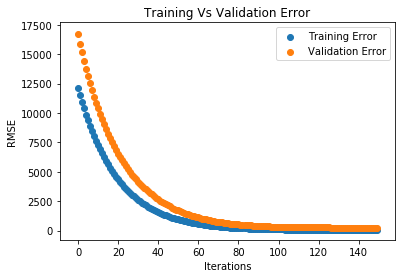

In [231]:
# Let's plot the training and validation errors in order to observe the training and check for overfitting (there isn't overfitting).

plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

In [232]:
df_big

,DJI,S&P500,NASDAQ,Russell_3000,Willshire_5000,ma7,ma21,26ema,12ema,MACD,...,fourier_3,fourier_6,fourier_9,compound_mean,compound_max,compound_min,subjectivity_mean,subjectivity_max,subjectivity_min,ARIMA_preds
0,11734.32,1296.32,2414.100,756.344,13197.13,NaN,NaN,11734.320000,11734.320000,0.000000,...,13020.393738,13625.561075,14208.265765,-0.350337,0.2144,-0.9260,0.163685,0.666667,0.0,17951.595888
1,11782.35,1305.32,2439.950,762.564,13307.96,NaN,NaN,11759.258654,11760.336250,1.077596,...,12993.558681,13571.794086,14132.880590,-0.085277,0.8156,-0.8271,0.202921,0.720000,0.0,12215.063732
2,11642.47,1289.59,2430.610,753.948,13163.60,NaN,NaN,11717.297624,11714.333025,-2.964599,...,12966.739656,13517.884758,14057.079210,-0.318394,0.5423,-0.8591,0.374076,1.000000,0.0,12287.415726
3,11532.96,1285.83,2428.620,752.935,13145.53,NaN,NaN,11665.764880,11657.080649,-8.684231,...,12939.937625,13463.839781,13980.881052,-0.162032,0.5106,-0.8074,0.176371,0.900000,0.0,11787.779555
4,11615.93,1292.93,2453.670,757.509,13228.23,NaN,NaN,11654.207966,11645.900165,-8.307801,...,12913.153552,13409.665890,13904.305727,-0.194879,0.7177,-0.8689,0.319615,1.000000,0.0,12024.632778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,17140.24,2000.54,4594.443,1177.348,20675.10,17663.235714,17773.005714,17714.658291,17657.372822,-57.285468,...,13154.775788,13892.030131,14578.282564,-0.178949,0.8442,-0.8720,0.359450,1.000000,0.0,17425.015328
1985,17409.72,2036.09,4691.867,1198.448,21045.53,17625.315714,17750.934286,17692.070269,17619.272388,-72.797881,...,13127.875023,13839.073504,14505.262783,-0.027012,0.8316,-0.8818,0.324485,1.000000,0.0,17181.321307
1986,17694.68,2070.77,4779.246,1219.612,21419.50,17609.574286,17746.528571,17692.263582,17630.873559,-61.390023,...,13100.985471,13785.941816,14431.732723,-0.202743,0.7783,-0.9211,0.179425,0.906250,0.0,17392.489084
1987,17929.99,2098.86,4842.672,1236.623,21711.72,17623.897143,17753.210476,17709.872947,17676.891473,-32.981474,...,13074.108097,13732.641511,14357.710761,-0.235306,0.7351,-0.9578,0.186443,0.700000,0.0,17686.580316


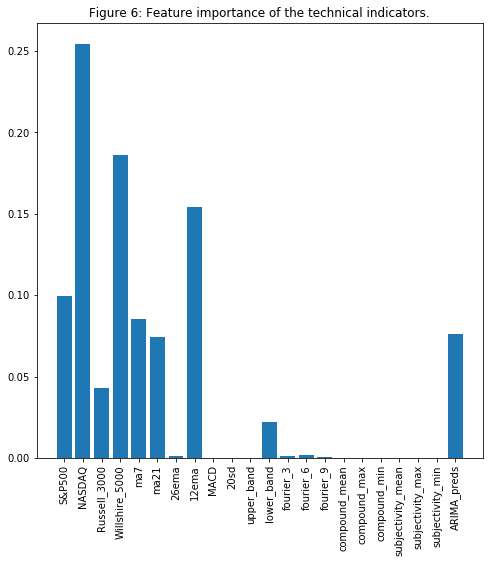

In [233]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

In [183]:
len(X_test_FI.columns)

23

In [184]:
xgbModel.feature_importances_.tolist()

[0.10702618956565857,
 0.00356312352232635,
 0.016844116151332855,
 0.07192787528038025,
 0.15602029860019684,
 0.04506368562579155,
 7.310198998311535e-05,
 2.188955659221392e-05,
 3.420243228902109e-05,
 2.8969177947146818e-05,
 0.00015485219773836434,
 0.0001683371956460178,
 0.5531115531921387,
 0.04528804123401642,
 0.0002241171314381063,
 0.0003151349083054811,
 4.365929635241628e-05,
 2.112413858412765e-05,
 1.5711479136371054e-05,
 2.529416451579891e-05,
 2.861476968973875e-05,
 0.0,
 0.0]

In [185]:
df_big.shape

(1989, 24)

In [186]:
df_big.T

,0,1,2,3,4,5,6,7,8,9,...,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988
DJI,11734.320000,11782.350000,11642.470000,11532.960000,11615.930000,11659.900000,11479.390000,11348.550000,11417.430000,11430.210000,...,17804.870000,17829.730000,17780.830000,18011.070000,17400.750000,17140.240000,17409.720000,17694.680000,17929.990000,17949.370000
S&P500,1296.320000,1305.320000,1289.590000,1285.830000,1292.930000,1298.200000,1278.600000,1266.690000,1274.540000,1277.720000,...,2083.250000,2088.900000,2085.450000,2113.320000,2037.410000,2000.540000,2036.090000,2070.770000,2098.860000,2102.950000
NASDAQ,2414.100000,2439.950000,2430.610000,2428.620000,2453.670000,2452.520000,2416.980000,2384.360000,2389.080000,2380.380000,...,4837.214000,4843.763000,4833.319000,4910.041000,4707.979000,4594.443000,4691.867000,4779.246000,4842.672000,4862.567000
Russell_3000,756.344000,762.564000,753.948000,752.935000,757.509000,759.822000,748.563000,741.286000,745.650000,746.808000,...,1229.710000,1232.071000,1229.639000,1247.104000,1201.623000,1177.348000,1198.448000,1219.612000,1236.623000,1239.520000
Willshire_5000,13197.130000,13307.960000,13163.600000,13145.530000,13228.230000,13271.880000,13078.170000,12950.260000,13021.040000,13037.900000,...,21576.650000,21627.450000,21583.880000,21890.490000,21103.020000,20675.100000,21045.530000,21419.500000,21711.720000,21760.520000
ma7,NaN,NaN,NaN,NaN,NaN,NaN,11635.331429,11580.221429,11528.090000,11497.767143,...,17732.277143,17727.190000,17734.097143,17782.132857,17747.930000,17663.235714,17625.315714,17609.574286,17623.897143,17647.974286
ma21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17783.343810,17799.000476,17812.710000,17827.234762,17805.770000,17773.005714,17750.934286,17746.528571,17753.210476,17758.487143
26ema,11734.320000,11759.258654,11717.297624,11665.764880,11654.207966,11655.348035,11624.054811,11579.664159,11555.617495,11538.312481,...,17766.230451,17770.934122,17771.667150,17789.400694,17760.611754,17714.658291,17692.070269,17692.263582,17709.872947,17727.613469
12ema,11734.320000,11760.336250,11714.333025,11657.080649,11645.900165,11649.302861,11611.387401,11556.537286,11529.016914,11510.293042,...,17770.122445,17779.292838,17779.529324,17815.150967,17751.396972,17657.372822,17619.272388,17630.873559,17676.891473,17718.811246
MACD,0.000000,1.077596,-2.964599,-8.684231,-8.307801,-6.045173,-12.667410,-23.126873,-26.600581,-28.019439,...,3.891993,8.358716,7.862175,25.750273,-9.214782,-57.285468,-72.797881,-61.390023,-32.981474,-8.802223


In [48]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series = df_big['DJI']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.DJI   No. Observations:                 1988
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12679.336
Method:                       css-mle   S.D. of innovations            142.450
Date:                Sat, 07 Dec 2019   AIC                          25372.672
Time:                        03:32:56   BIC                          25411.836
Sample:                             1   HQIC                         25387.056
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1045      2.685      1.156      0.248      -2.157       8.366
ar.L1.D.DJI    -0.0777      0.022     -3.472      0.001      -0.122      -0.034
ar.L2.D.DJI    -0.0456      0.022     -2.031    

In [53]:
! pip install --upgrade pandas


  Found existing installation: pandas 0.25.1
    Uninstalling pandas-0.25.1:
      Successfully uninstalled pandas-0.25.1


ERROR: fastai 1.0.59 requires nvidia-ml-py3, which is not installed.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\taru tak\\anaconda3\\envs\\fastai_v1\\lib\\site-packages\\~andas\\io\\msgpack\\_packer.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [55]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error



In [84]:
X = series.values
size = int(len(X) * 1)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(train)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = train[t]
    history.append(obs)

C:\Users\Taru Tak\Anaconda3\envs\fastai_v1\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [86]:
len(predictions)

1989

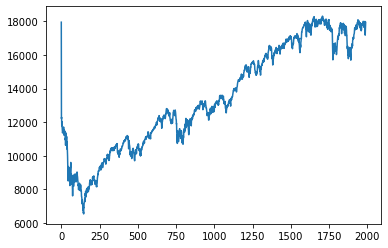

In [89]:
plt.plot(predictions)

In [228]:
df_big["ARIMA_preds"]=preds_arima

In [105]:
preds_arima=[]
for i in range(len(predictions)):
    x=predictions[i][0]
    preds_arima.append(x)

In [234]:
df_big

,DJI,S&P500,NASDAQ,Russell_3000,Willshire_5000,ma7,ma21,26ema,12ema,MACD,...,fourier_3,fourier_6,fourier_9,compound_mean,compound_max,compound_min,subjectivity_mean,subjectivity_max,subjectivity_min,ARIMA_preds
0,11734.32,1296.32,2414.100,756.344,13197.13,NaN,NaN,11734.320000,11734.320000,0.000000,...,13020.393738,13625.561075,14208.265765,-0.350337,0.2144,-0.9260,0.163685,0.666667,0.0,17951.595888
1,11782.35,1305.32,2439.950,762.564,13307.96,NaN,NaN,11759.258654,11760.336250,1.077596,...,12993.558681,13571.794086,14132.880590,-0.085277,0.8156,-0.8271,0.202921,0.720000,0.0,12215.063732
2,11642.47,1289.59,2430.610,753.948,13163.60,NaN,NaN,11717.297624,11714.333025,-2.964599,...,12966.739656,13517.884758,14057.079210,-0.318394,0.5423,-0.8591,0.374076,1.000000,0.0,12287.415726
3,11532.96,1285.83,2428.620,752.935,13145.53,NaN,NaN,11665.764880,11657.080649,-8.684231,...,12939.937625,13463.839781,13980.881052,-0.162032,0.5106,-0.8074,0.176371,0.900000,0.0,11787.779555
4,11615.93,1292.93,2453.670,757.509,13228.23,NaN,NaN,11654.207966,11645.900165,-8.307801,...,12913.153552,13409.665890,13904.305727,-0.194879,0.7177,-0.8689,0.319615,1.000000,0.0,12024.632778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,17140.24,2000.54,4594.443,1177.348,20675.10,17663.235714,17773.005714,17714.658291,17657.372822,-57.285468,...,13154.775788,13892.030131,14578.282564,-0.178949,0.8442,-0.8720,0.359450,1.000000,0.0,17425.015328
1985,17409.72,2036.09,4691.867,1198.448,21045.53,17625.315714,17750.934286,17692.070269,17619.272388,-72.797881,...,13127.875023,13839.073504,14505.262783,-0.027012,0.8316,-0.8818,0.324485,1.000000,0.0,17181.321307
1986,17694.68,2070.77,4779.246,1219.612,21419.50,17609.574286,17746.528571,17692.263582,17630.873559,-61.390023,...,13100.985471,13785.941816,14431.732723,-0.202743,0.7783,-0.9211,0.179425,0.906250,0.0,17392.489084
1987,17929.99,2098.86,4842.672,1236.623,21711.72,17623.897143,17753.210476,17709.872947,17676.891473,-32.981474,...,13074.108097,13732.641511,14357.710761,-0.235306,0.7351,-0.9578,0.186443,0.700000,0.0,17686.580316


In [235]:
df_big.index=indicators_data.Date

In [236]:
df_big.to_csv("data_final.csv")

In [237]:
df_big

,DJI,S&P500,NASDAQ,Russell_3000,Willshire_5000,ma7,ma21,26ema,12ema,MACD,...,fourier_3,fourier_6,fourier_9,compound_mean,compound_max,compound_min,subjectivity_mean,subjectivity_max,subjectivity_min,ARIMA_preds
Date,,,,,,,,,,,,,,,,,,,,,
8/8/2008,11734.32,1296.32,2414.100,756.344,13197.13,NaN,NaN,11734.320000,11734.320000,0.000000,...,13020.393738,13625.561075,14208.265765,-0.350337,0.2144,-0.9260,0.163685,0.666667,0.0,17951.595888
8/11/2008,11782.35,1305.32,2439.950,762.564,13307.96,NaN,NaN,11759.258654,11760.336250,1.077596,...,12993.558681,13571.794086,14132.880590,-0.085277,0.8156,-0.8271,0.202921,0.720000,0.0,12215.063732
8/12/2008,11642.47,1289.59,2430.610,753.948,13163.60,NaN,NaN,11717.297624,11714.333025,-2.964599,...,12966.739656,13517.884758,14057.079210,-0.318394,0.5423,-0.8591,0.374076,1.000000,0.0,12287.415726
8/13/2008,11532.96,1285.83,2428.620,752.935,13145.53,NaN,NaN,11665.764880,11657.080649,-8.684231,...,12939.937625,13463.839781,13980.881052,-0.162032,0.5106,-0.8074,0.176371,0.900000,0.0,11787.779555
8/14/2008,11615.93,1292.93,2453.670,757.509,13228.23,NaN,NaN,11654.207966,11645.900165,-8.307801,...,12913.153552,13409.665890,13904.305727,-0.194879,0.7177,-0.8689,0.319615,1.000000,0.0,12024.632778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/27/2016,17140.24,2000.54,4594.443,1177.348,20675.10,17663.235714,17773.005714,17714.658291,17657.372822,-57.285468,...,13154.775788,13892.030131,14578.282564,-0.178949,0.8442,-0.8720,0.359450,1.000000,0.0,17425.015328
6/28/2016,17409.72,2036.09,4691.867,1198.448,21045.53,17625.315714,17750.934286,17692.070269,17619.272388,-72.797881,...,13127.875023,13839.073504,14505.262783,-0.027012,0.8316,-0.8818,0.324485,1.000000,0.0,17181.321307
6/29/2016,17694.68,2070.77,4779.246,1219.612,21419.50,17609.574286,17746.528571,17692.263582,17630.873559,-61.390023,...,13100.985471,13785.941816,14431.732723,-0.202743,0.7783,-0.9211,0.179425,0.906250,0.0,17392.489084
